Importing the Essential Libraries and loading data :

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.io as pio
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

In [124]:
df = pd.read_csv('house_price.csv')
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Now, we check the data set information :

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [126]:
df.shape

(1460, 81)

Check the missing and duplicates values :

In [127]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [128]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [129]:
df = df.dropna(axis = 1, how = 'any')

In [130]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 62, dtype: int64

In [131]:
df.duplicated().sum() 

0

Exploratory Data Analysis :

In [132]:
df.describe().round(1)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,730.5,56.9,10516.8,6.1,5.6,1971.3,1984.9,443.6,46.5,567.2,...,94.2,46.7,22.0,3.4,15.1,2.8,43.5,6.3,2007.8,180921.2
std,421.6,42.3,9981.3,1.4,1.1,30.2,20.6,456.1,161.3,441.9,...,125.3,66.3,61.1,29.3,55.8,40.2,496.1,2.7,1.3,79442.5
min,1.0,20.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0
25%,365.8,20.0,7553.5,5.0,5.0,1954.0,1967.0,0.0,0.0,223.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
50%,730.5,50.0,9478.5,6.0,5.0,1973.0,1994.0,383.5,0.0,477.5,...,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
75%,1095.2,70.0,11601.5,7.0,6.0,2000.0,2004.0,712.2,0.0,808.0,...,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
max,1460.0,190.0,215245.0,10.0,9.0,2010.0,2010.0,5644.0,1474.0,2336.0,...,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0


Visualizing the correlations between numerical variables :

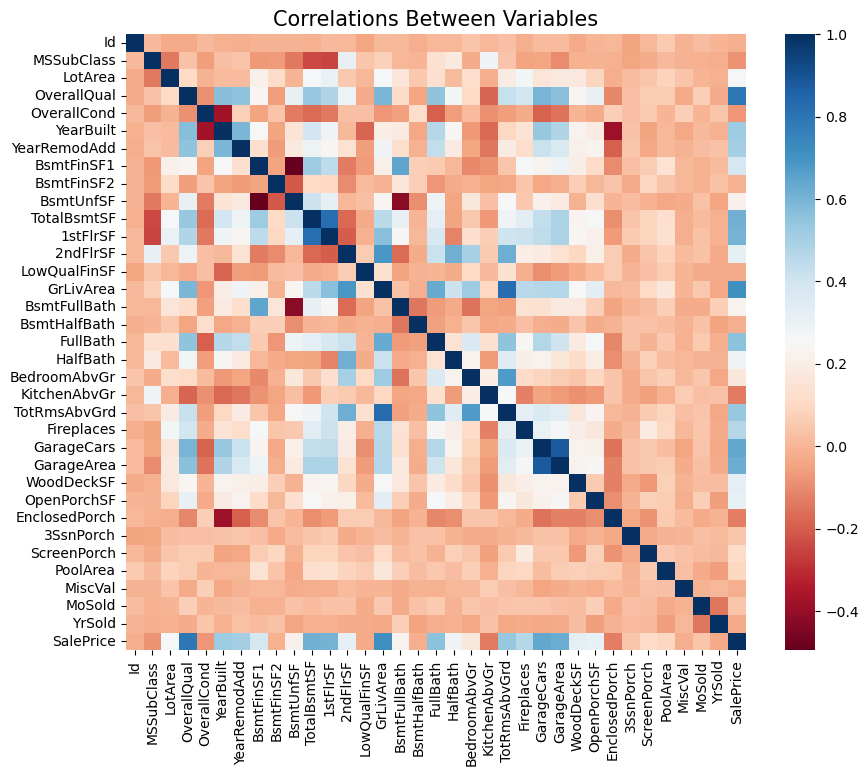

In [133]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

Feature selection :

We are selecting numerical features which have more than 0.50 or less than -0.50 correlation rate based on Pearson Correlation Method—which is the default value of parameter "method" in corr() function. As for selecting categorical features, I selected the categorical values which I believe have significant effect on the target variable such as Heating and MSZoning.

In [134]:
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50) | (df.corr()["SalePrice"]<-0.50)].index)
cat_cols = ["MSZoning", "Street","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols + cat_cols

df = df[important_cols]

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OverallQual    1460 non-null   int64 
 1   YearBuilt      1460 non-null   int64 
 2   YearRemodAdd   1460 non-null   int64 
 3   TotalBsmtSF    1460 non-null   int64 
 4   1stFlrSF       1460 non-null   int64 
 5   GrLivArea      1460 non-null   int64 
 6   FullBath       1460 non-null   int64 
 7   TotRmsAbvGrd   1460 non-null   int64 
 8   GarageCars     1460 non-null   int64 
 9   GarageArea     1460 non-null   int64 
 10  SalePrice      1460 non-null   int64 
 11  MSZoning       1460 non-null   object
 12  Street         1460 non-null   object
 13  BldgType       1460 non-null   object
 14  Heating        1460 non-null   object
 15  KitchenQual    1460 non-null   object
 16  SaleCondition  1460 non-null   object
 17  LandSlope      1460 non-null   object
dtypes: int64(11), object(7)
memo

Data Visualization :

Price density in the market using a Gaussian kernel distribution.

Text(0.5, 1.0, 'Market Price')

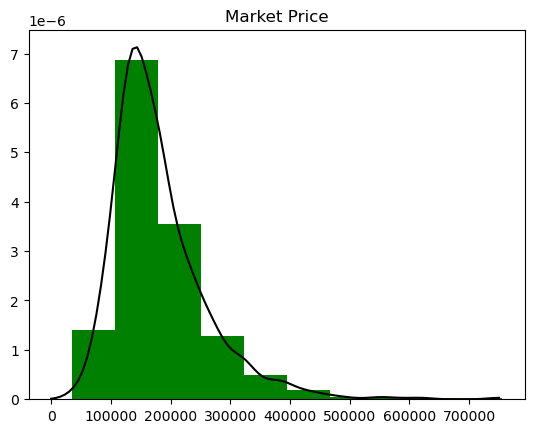

In [136]:
import scipy.stats as stats
kde = stats.kde.gaussian_kde(df['SalePrice'])
x = np.linspace(0, 750000, 100)
y = kde(x)

plt.hist(df.SalePrice, color = 'green', density=True, label = 'Sale Price')
plt.plot(x,y,'k')
plt.title('Market Price')


The columns "TotalBsmtSF", "GrLivArea" and "GarageArea" represent the cellar area, living area and garage area respectively. We will display the sale price according to each of these data :

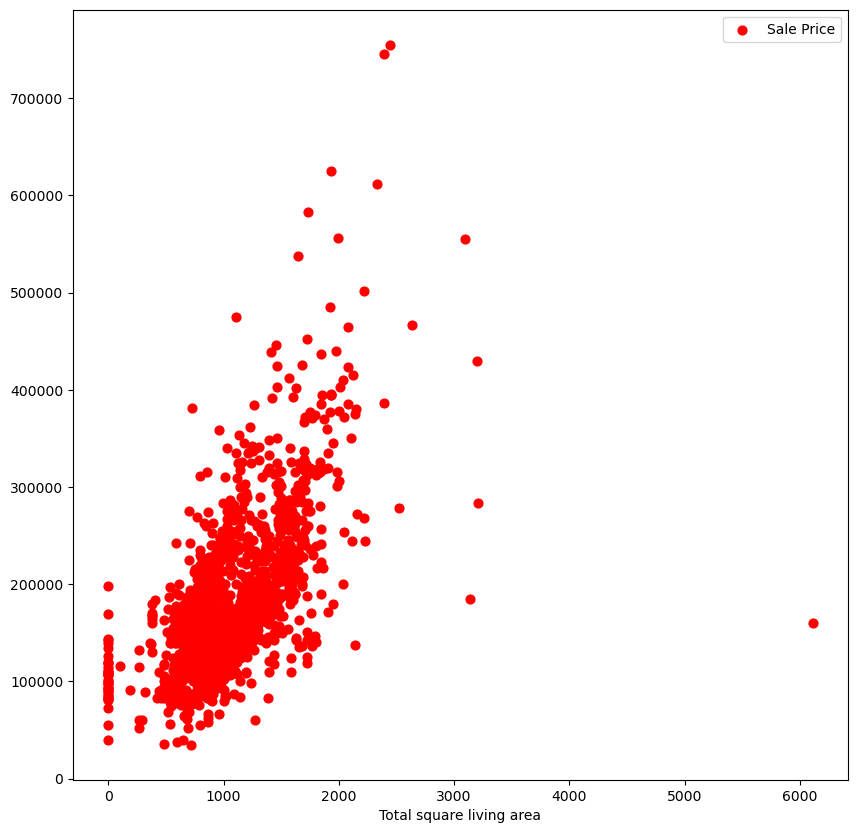

In [166]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df.TotalBsmtSF,df.SalePrice, s=40, color = 'red', label = 'Sale Price')
plt.xlabel('Total square living area')
plt.legend();


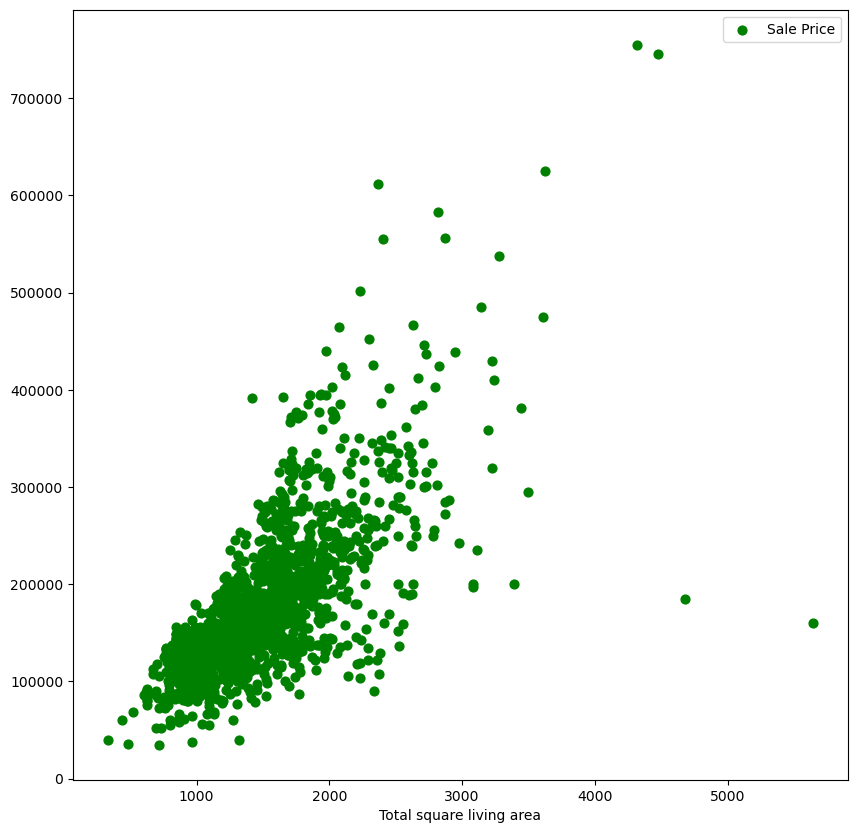

In [138]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df.GrLivArea,df.SalePrice, s=40, color = 'green', label = 'Sale Price')
plt.xlabel('Total square living area')
plt.legend();

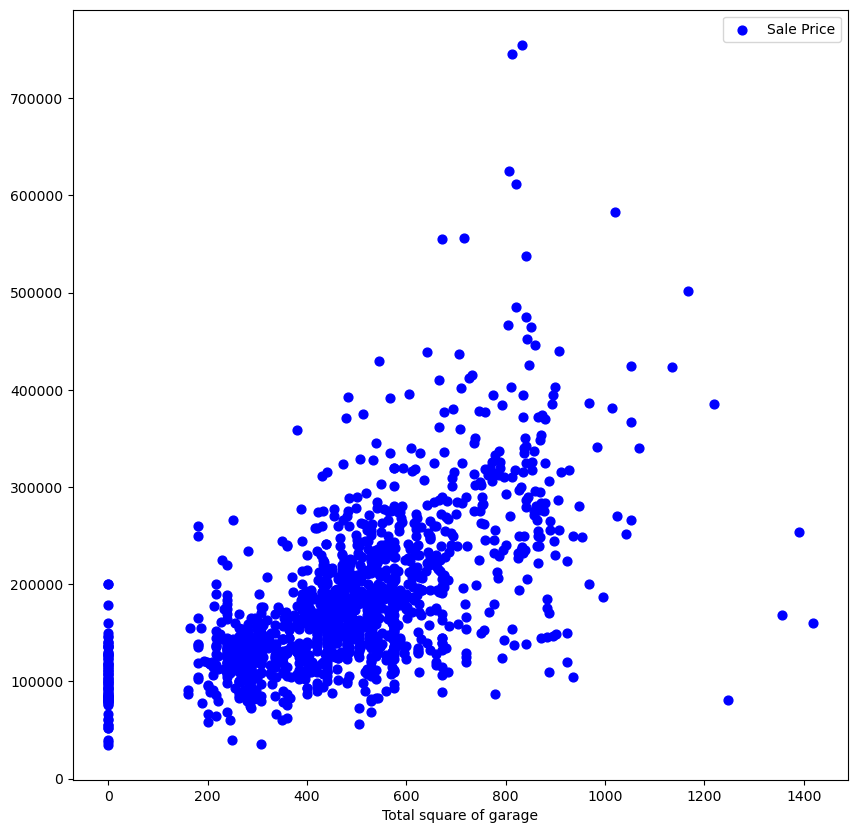

In [139]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df.GarageArea,df.SalePrice, s=40, color = 'blue', label = 'Sale Price')
plt.xlabel('Total square of garage')
plt.legend();

Sale price for each quality level :

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

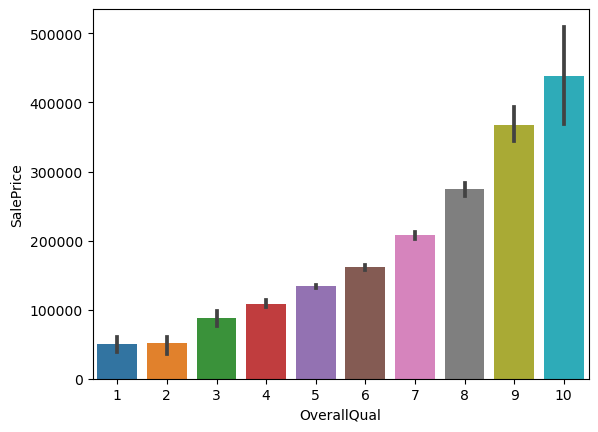

In [140]:
sns.barplot(df.OverallQual, df.SalePrice)

Living space for each quality level :

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

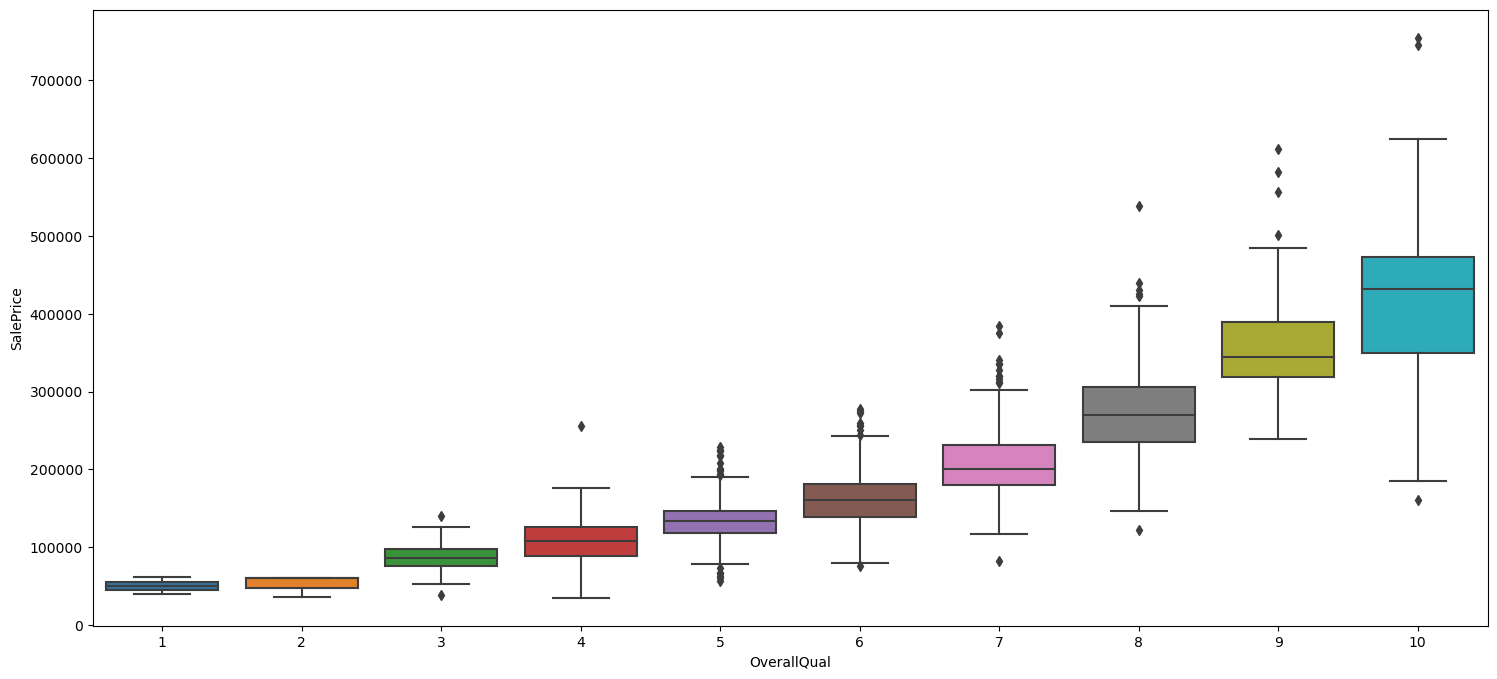

In [141]:
plt.figure(figsize=(18, 8))
sns.boxplot(x=df.OverallQual, y=df.SalePrice)

Prepraring data for prediction :

In [142]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

One-Hot Encoding : Encoding the categorical features in X dataset by using One-Hot Encoding method

In [143]:
X = pd.get_dummies(X, columns=cat_cols)

Standardizing the Data : Standardizing the numerical columns in X dataset. StandardScaler() adjusts the mean of the features as 0 and standard deviation of features as 1.

In [144]:
important_num_cols.remove("SalePrice")

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [145]:
X.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0.651479,1.050994,0.878668,-0.459303,-0.793434,0.370333,0.789741,0.912210,0.311725,0.351000,...,0,0,0,0,0,1,0,1,0,0
1,-0.071836,0.156734,-0.429577,0.466465,0.257140,-0.482512,0.789741,-0.318683,0.311725,-0.060731,...,1,0,0,0,0,1,0,1,0,0
2,0.651479,0.984752,0.830215,-0.313369,-0.627826,0.515013,0.789741,-0.318683,0.311725,0.631726,...,0,0,0,0,0,1,0,1,0,0
3,0.651479,-1.863632,-0.720298,-0.687324,-0.521734,0.383659,-1.026041,0.296763,1.650307,0.790804,...,0,1,0,0,0,0,0,1,0,0
4,1.374795,0.951632,0.733308,0.199680,-0.045611,1.299326,0.789741,1.527656,1.650307,1.698485,...,0,0,0,0,0,1,0,1,0,0


Train Test split : Splitting the data into Train and Test chunks for better evaluation

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Defining several evaluation functions :

In [147]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, y_pred_test):
    mae = mean_absolute_error(y, y_pred_test)
    mse = mean_squared_error(y, y_pred_test)
    r_squared = r2_score(y, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y, y_pred_test))
    return mae, mse, rmse, r_squared

Machine Learning Models :

In [148]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

Linear Regression :

In [149]:
model_linreg = LinearRegression()
model_linreg.fit(X_train, y_train)
y_pred_test = model_linreg.predict(X_test)
mae, mse, rmse, r_squared = evaluation(y_test, y_pred_test)
print("MAE :", mae)
print("MSE :", mse)
print("RMSE :", rmse)
print("R² Score: ", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(model_linreg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE : 20907.458709976112
MSE : 1050248338.563833
RMSE : 32407.535212722258
R² Score:  0.8300463150064272
------------------------------
RMSE Cross-Validation: 35978.0726925032


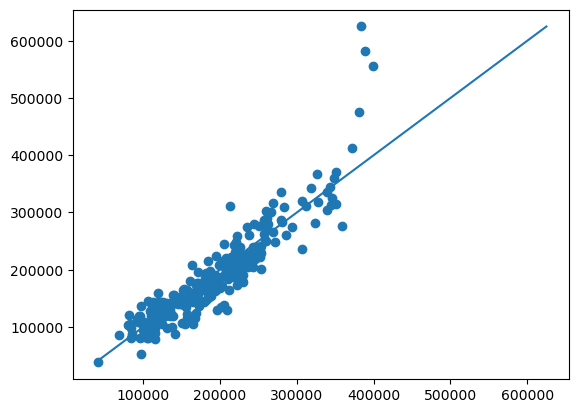

In [150]:
plt.scatter(y_pred_test, y_test)
plt.plot((y_test.min(), y_test.max()),(y_test.min(),y_test.max()));

RandomForestRegression :

In [151]:
model_rfr = RandomForestRegressor(n_estimators=1000)
model_rfr.fit(X_train, y_train)
y_pred_test = model_rfr.predict(X_test)
mae, mse, rmse, r_squared = evaluation(y_test, y_pred_test)
print("MAE :", mae)
print("MSE :", mse)
print("RMSE :", rmse)
print("R² Score: ", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(model_rfr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE : 17784.97572703419
MSE : 739401123.5177912
RMSE : 27191.931220819737
R² Score:  0.8803483509413819
------------------------------
RMSE Cross-Validation: 31162.679902167583


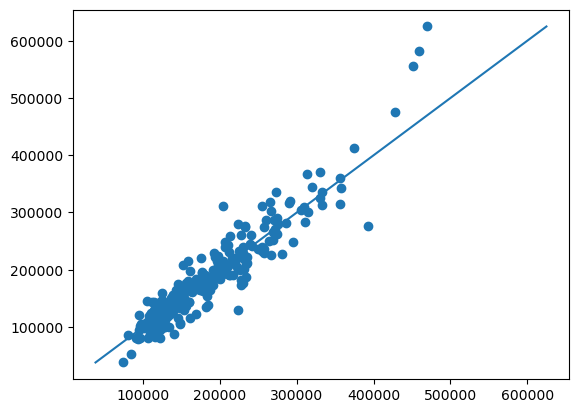

In [152]:
plt.scatter(y_pred_test, y_test)
plt.plot((y_test.min(), y_test.max()),(y_test.min(),y_test.max()));

GradientBoostingRegressor :

In [153]:
model_gbr = GradientBoostingRegressor(n_estimators=100, max_depth=4)
model_gbr.fit(X_train, y_train)
y_pred_test = model_gbr.predict(X_test)
mae, mse, rmse, r_squared = evaluation(y_test, y_pred_test)
print("MAE :", mae)
print("MSE :", mse)
print("RMSE :", rmse)
print("R² Score: ", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(model_gbr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "GradientBoostingRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE : 16978.38198981492
MSE : 624024632.790844
RMSE : 24980.485039142935
R² Score:  0.8990188491851453
------------------------------
RMSE Cross-Validation: 28947.02065581344


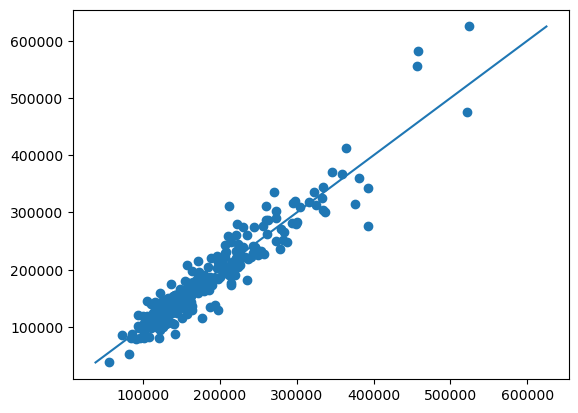

In [154]:
plt.scatter(y_pred_test, y_test)
plt.plot((y_test.min(), y_test.max()),(y_test.min(),y_test.max()));

Ridge Regression :

In [155]:
model_ridge = RidgeCV(alphas = (0.001,0.01,0.1,0.3,0.7,1,10,50,100))
model_ridge.fit(X_train, y_train)
print("alpha sélectionné par CV :",model_ridge.alpha_)
y_pred_test = model_ridge.predict(X_test)
mae, mse, rmse, r_squared = evaluation(y_test, y_pred_test)
print("MAE :", mae)
print("MSE :", mse)
print("RMSE :", rmse)
print("R² Score: ", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(model_ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RidgeRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

alpha sélectionné par CV : 50.0
MAE : 20365.54574166048
MSE : 1056809209.4490365
RMSE : 32508.602083895217
R² Score:  0.8289846192695578
------------------------------
RMSE Cross-Validation: 35935.08415513522


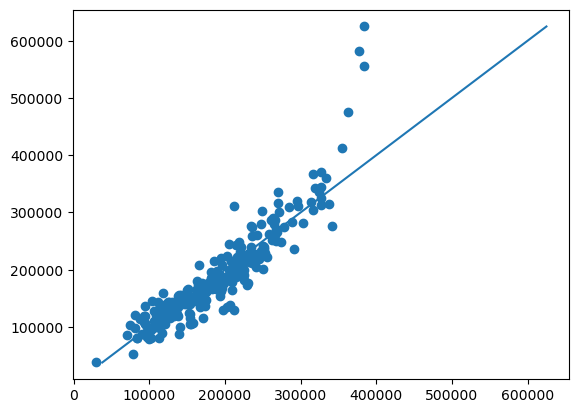

In [156]:
plt.scatter(y_pred_test, y_test)
plt.plot((y_test.min(), y_test.max()),(y_test.min(),y_test.max()));

Lasso Regression :

In [157]:
model_lasso = LassoCV(cv=10)
model_lasso.fit(X_train, y_train)
alphas = model_lasso.alphas_
y_pred_test = model_lasso.predict(X_test)
mae, mse, rmse, r_squared = evaluation(y_test, y_pred_test)
print("MAE :", mae)
print("MSE :", mse)
print("RMSE :", rmse)
print("R² Score: ", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(model_lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LassoRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE : 20490.639172862033
MSE : 1032077678.8618902
RMSE : 32125.96580434416
R² Score:  0.8329867343926958
------------------------------
RMSE Cross-Validation: 35823.83131140297


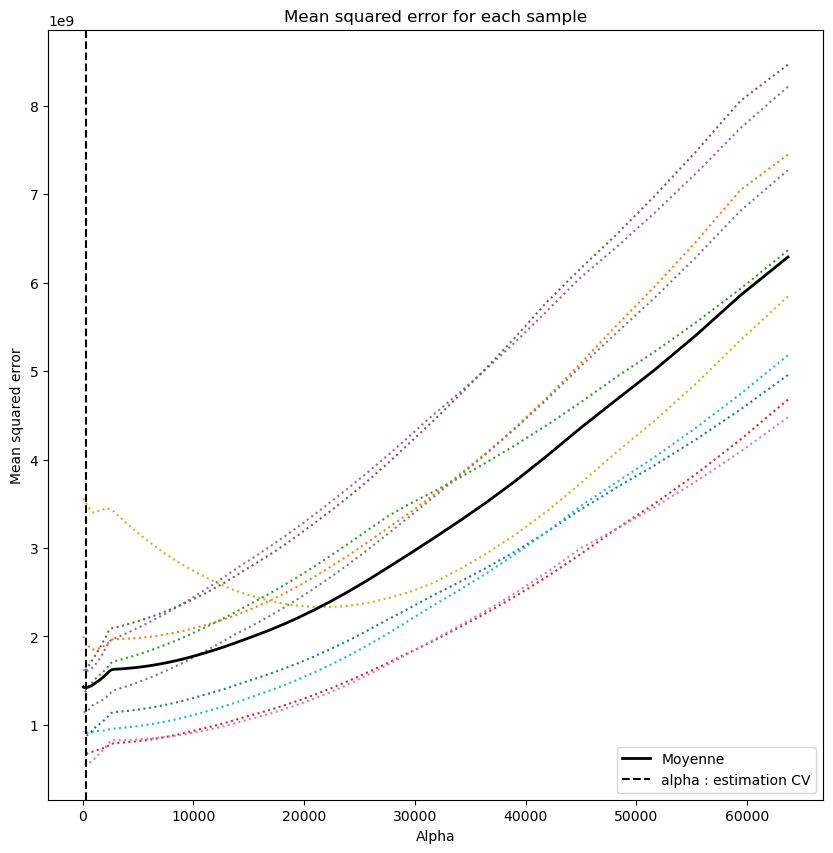

In [158]:
plt.figure(figsize=(10,10))

plt.plot(alphas, model_lasso.mse_path_, ':')
plt.plot(alphas, model_lasso.mse_path_.mean(axis = 1), 'k', label = 'Moyenne', linewidth = 2)

plt.axvline(model_lasso.alpha_, linestyle='--', color = 'k', label = 'alpha : estimation CV')
plt.xlabel('Alpha')
plt.ylabel('Mean squared error')
plt.title('Mean squared error for each sample')
plt.legend();

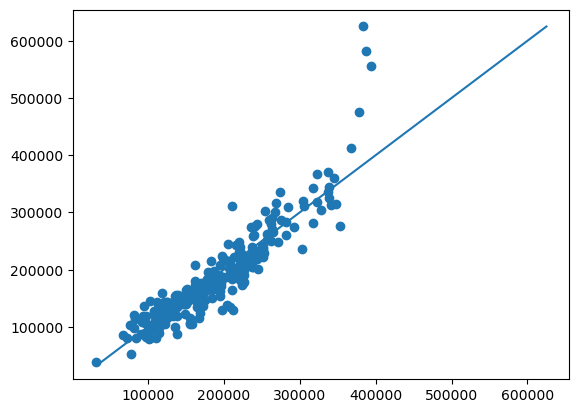

In [159]:
plt.scatter(y_pred_test, y_test)
plt.plot((y_test.min(), y_test.max()),(y_test.min(),y_test.max()));

Elastic Net :

In [160]:
model_elastic =ElasticNetCV(cv=8, l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99),alphas=(0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0))
model_elastic.fit(X_train, y_train)
y_pred_test = model_elastic.predict(X_test)
mae, mse, rmse, r_squared = evaluation(y_test, y_pred_test)
print("MAE :", mae)
print("MSE :", mse)
print("RMSE :", rmse)
print("R² Score: ", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(model_elastic)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE : 20453.628906987415
MSE : 1041642400.9865127
RMSE : 32274.48529390535
R² Score:  0.8314389483012252
------------------------------
RMSE Cross-Validation: 35809.34485837709


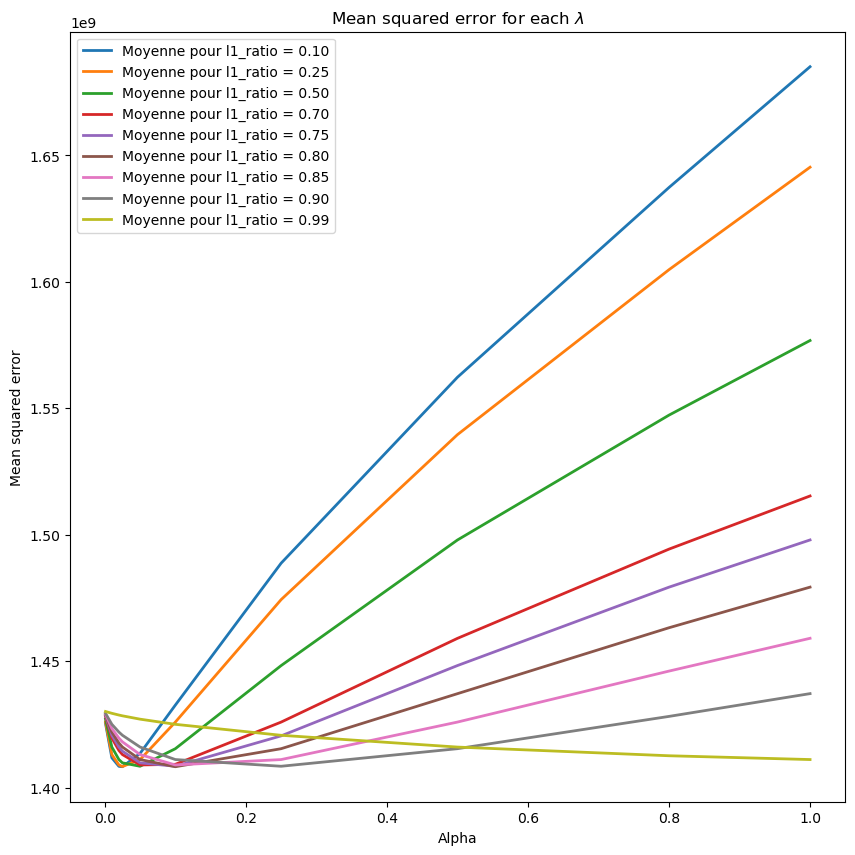

In [161]:
alphas = model_elastic.alphas_
plt.figure(figsize=(10,10))
for i in range(model_elastic.mse_path_.shape[0]) :
    plt.plot(alphas, model_elastic.mse_path_[i,:,:].mean(axis=1),
             label = 'Moyenne pour l1_ratio = %.2F'%model_elastic.l1_ratio[i], linewidth= 2)
plt.xlabel('Alpha')
plt.ylabel('Mean squared error')
plt.title('Mean squared error for each $\lambda$')
plt.legend();

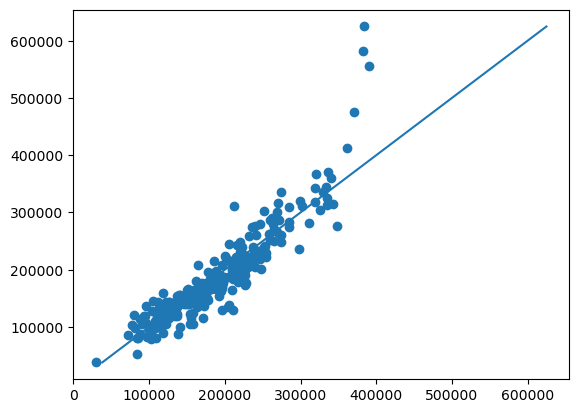

In [162]:
plt.scatter(y_pred_test, y_test)
plt.plot((y_test.min(), y_test.max()),(y_test.min(),y_test.max()));

Model Comparaison : The less the Root Mean Squared Error (RMSE), The better the model is.

In [163]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
2,GradientBoostingRegressor,16978.381990,6.240246e+08,24980.485039,0.899019,28947.020656
1,RandomForestRegression,17784.975727,7.394011e+08,27191.931221,0.880348,31162.679902
5,ElasticNet,20453.628907,1.041642e+09,32274.485294,0.831439,35809.344858
4,LassoRegression,20490.639173,1.032078e+09,32125.965804,0.832987,35823.831311
3,RidgeRegression,20365.545742,1.056809e+09,32508.602084,0.828985,35935.084155
0,LinearRegression,20907.458710,1.050248e+09,32407.535213,0.830046,35978.072693


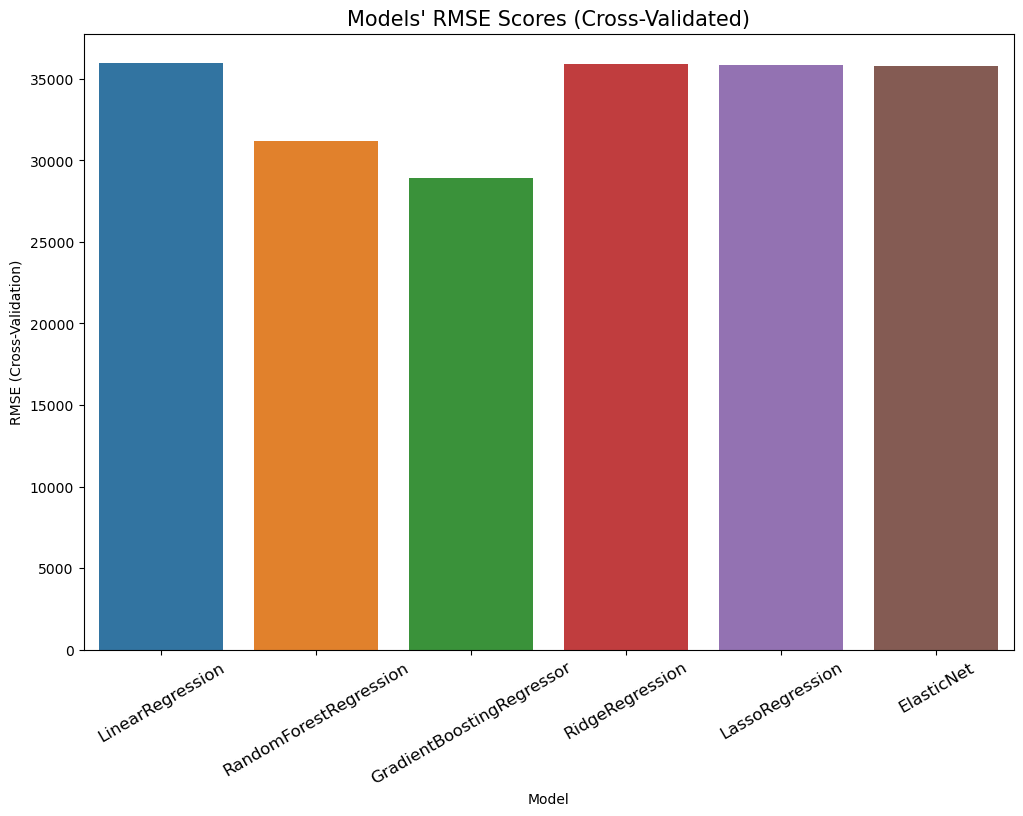

In [164]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()